In [2]:
library(dplyr)
library(Seurat)
library(patchwork)
library(ggplot2)

# Data load

### Combine all cells that have completed subtype clustering

In [3]:
t <- readRDS("./t_cluster_name.rds")
ILC <- readRDS("./ILC_cluster_name.rds")
mast <- readRDS("./mast_cluster.rds")
mnp_pdc <- readRDS("./MNP_pDC_cluster_name.rds")
plasma <- readRDS("./plasma_cluster_name.rds")
b <- readRDS("./b_cluster.rds")
stromal.gli <- readRDS("./stromal.gli_cluster_name.rds")

In [4]:
ALL <- merge(t, y = c(ILC, mast, mnp_pdc, plasma, b, stromal.gli), add.cell.ids = c("T", "ILC", "mast", "MNP_pDC", "Plasma", "B", 
                                                                                       "Stromal.gli"), 
                                   project = "GIMATS", merge.data = TRUE)

### Combine only subtypes corresponding to GIMATS module

In [5]:
infMa_actDC <- readRDS("./infMa_actDC.rds")
high_act_T <- readRDS("./high_act_T.rds")
ACKR1_actfib <- readRDS("./ACKR1_actfib.rds")
IgG <- readRDS("./IgG.rds")

In [6]:
GIMATS <- merge(infMa_actDC, y = c(high_act_T, ACKR1_actfib, IgG), add.cell.ids = c("infMa_actDC", "high_act_T", "ACKR1_actfib", "IgG"), 
                                   project = "GIMATS", merge.data = TRUE)

# Finding ligands and receptors that are highly expressed in GIMATS

### when compared to the subtype cluster

In [7]:
ligand <- c('CCL20', 'IFNG', 'TGFB1', 'XCL2', 'XCL1', 'LTA', 'IL26', 'LTB', 'AREG', 'TNFSF13B', 'CSF2', 'IL2', 'IL22', 'PROK2', 'IL17A', 
            'IL17F', 'CCL5', 'IL32', 'IL16', 'TNFSF8', 'EBI3', 'CCL17', 'IL15', 'CXCL11', 'IL12B', 'CCL22', 'CCL19', 'BTLA', 'CCL25', 
            'VEGFB', 'UTS2', 'CSF1', 'ANXA1', 'TNF', 'IL6', 'IFNB1', 'CXCL3', 'CXCL2', 'CXCL10', 'CXCL9', 'IL1B', 'IL1A', 'CCL3L3', 
            'CCL3', 'OSM', 'CXCL16', 'CXCL8', 'IL23A', 'CCL4L2', 'HBEGF', 'IL18', 'IL10', 'IAPP', 'TNFSF12', 'CALM2', 'ARF1', 'CX3CL1',
           'TNFSF10', 'GAS6', 'CCL28', 'IL12A', 'CCL21', 'HEBP1', 'APP', 'CCL14', 'IL33', 'CCL23', 'CCL13', 'IL34', 'CXCL12', 'IL7', 
            'CCL11', 'CCL8', 'CXCL6', 'CXCL5', 'CXCL1', 'CCL7', 'CXCL13', 'IL11', 'CCL2', 'ADM', 'TGFB3', 'IL24', 'IL23', 'IL17')
receptor <- c('CXCR3', 'IL10RA', 'CXCR4', 'CCR7', 'IL27RA', 'CCR4', 'IL12RB1', 'CCR9', 'CXCR6', 'IL7R', 'CCR5', 'IL2RA', 'CCR6', 'IL23R',
              'IL18R1', 'TNFRSF4', 'CCR8', 'TNFRSF13B', 'CCR8', 'TNFRSF10A', 'FLT1', 'CALCRL', 'IFNAR1', 'IL1R1', 'IL15RA', 'RAMP1', 'AXL',
              'LTBR', 'TNFRSF1A', 'TNFRSF12A', 'OSMR', 'EGFR', 'IL11RA', 'AKAP9', 'TGRBR2', 'NOTCH1', 'ACKR2', 'XCR1', 'IL17RA', 'IFNGR1', 
              'CCR1', 'FPR2', 'FPR3', 'CSF1R', 'CSF2RA', 'CX3CR1', 'CCR2', 'CD4', 'IL6R', 'TNFRSF8', 'CHRM3', 'CCR3', 'CXCR2', 'IL1RL1',
              'ACKR1')

In [8]:
#Since there are too many cells in tcell, the heatmap is not drawn, so except for the T cluster.
t_T <- subset(t, idents = "T")
t_na <- subset(t, idents = c("type3_T", "Naive_CM", "Treg", "TFH", "type1_T", "high_act_T"))

In [9]:
Idents(t_na) <- t_na$celltype
Idents(t_T) <- t_T$celltype
Idents(plasma) <- plasma$celltype
Idents(stromal.gli) <- stromal.gli$celltype
Idents(mnp_pdc) <- mnp_pdc$celltype

In [10]:
t_na <- ScaleData(t_na, verbose = FALSE)
t_T <- ScaleData(t_T, verbose = FALSE)
plasma <- ScaleData(plasma, verbose = FALSE)
stromal.gli <- ScaleData(stromal.gli, verbose = FALSE)
mnp_pdc <- ScaleData(mnp_pdc, verbose = FALSE)

Warning message in DoHeatmap(t_na, features = ligand, size = 4):
“The following features were omitted as they were not found in the scale.data slot for the integrated assay: IL17, IL23, TGFB3, IL7, IL34, HEBP1, IL12A, CCL28, ARF1, CALM2, TNFSF12, IAPP, IFNB1, CSF1, VEGFB, CCL25, BTLA, IL15, TNFSF8, IL16, IL32, PROK2, TNFSF13B, IL26, LTA, TGFB1”
Warning message in DoHeatmap(t_na, features = receptor, size = 4):
“The following features were omitted as they were not found in the scale.data slot for the integrated assay: CXCR2, CCR3, CHRM3, TNFRSF8, IL6R, CD4, CCR2, CX3CR1, FPR2, CCR1, IFNGR1, IL17RA, ACKR2, NOTCH1, TGRBR2, AKAP9, IL11RA, EGFR, OSMR, LTBR, IL15RA, IFNAR1, TNFRSF10A, TNFRSF13B, CCR8, IL18R1, IL23R, CCR6, CCR5, IL7R, CXCR6, CCR9, IL12RB1, CCR4, IL27RA, CXCR4, IL10RA, CXCR3”


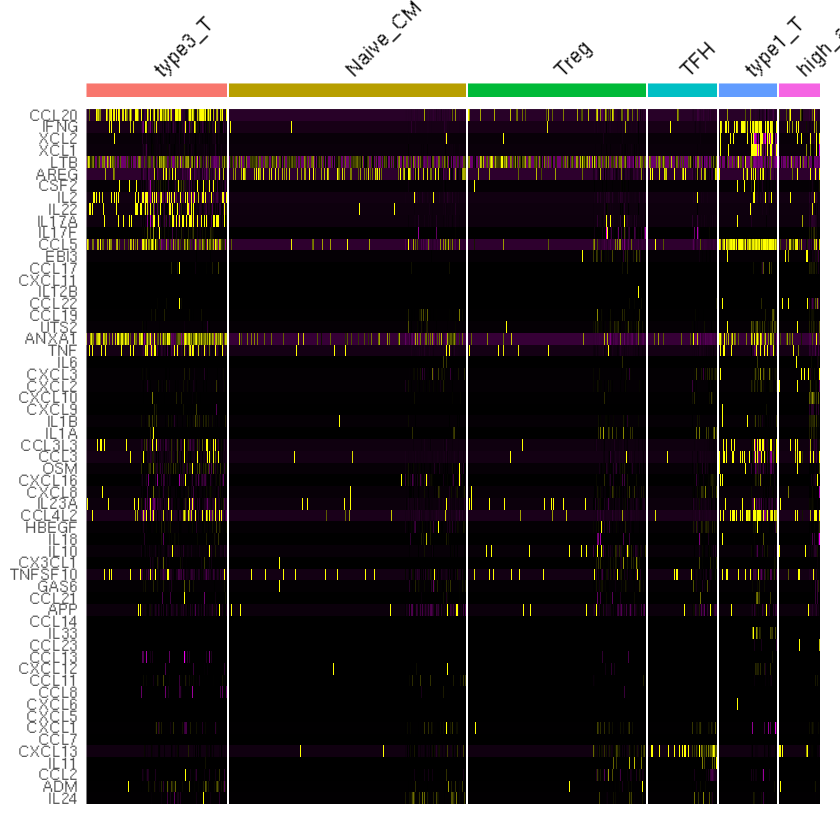

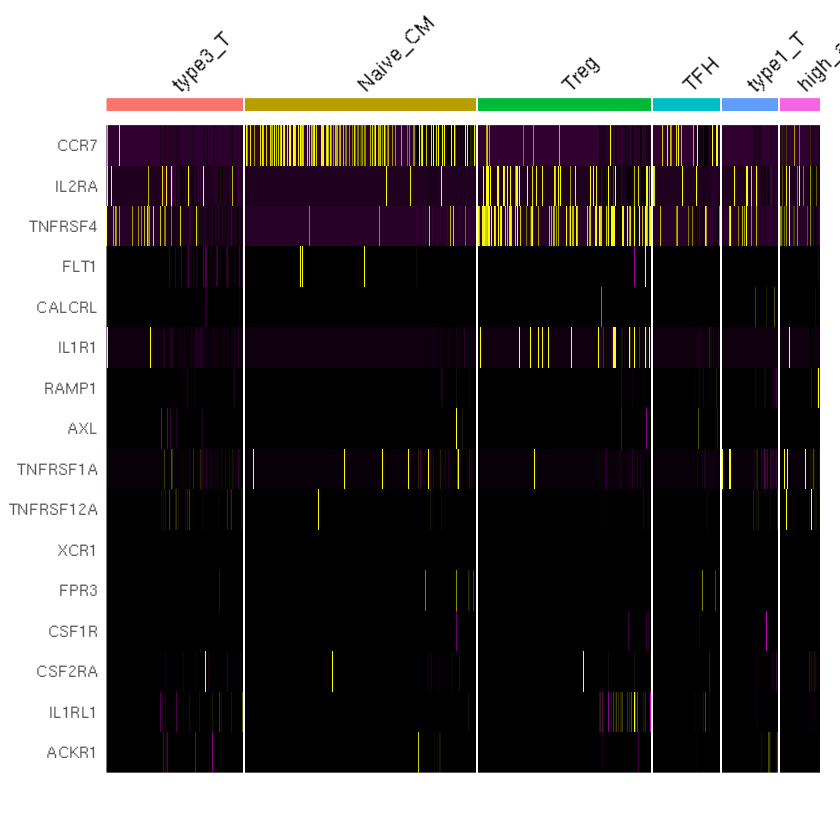

In [11]:
DoHeatmap(t_na, features = ligand, size = 4) + NoLegend()
DoHeatmap(t_na, features = receptor, size = 4) + NoLegend()

Warning message in DoHeatmap(plasma, features = ligand, size = 4):
“The following features were omitted as they were not found in the scale.data slot for the integrated assay: IL17, IL23, TGFB3, IL7, IL34, HEBP1, IL12A, CCL28, ARF1, CALM2, TNFSF12, IAPP, IFNB1, CSF1, VEGFB, CCL25, BTLA, IL15, TNFSF8, IL16, IL32, PROK2, TNFSF13B, IL26, LTA, TGFB1”
Warning message in DoHeatmap(plasma, features = receptor, size = 4):
“The following features were omitted as they were not found in the scale.data slot for the integrated assay: CXCR2, CCR3, CHRM3, TNFRSF8, IL6R, CD4, CCR2, CX3CR1, FPR2, CCR1, IFNGR1, IL17RA, ACKR2, NOTCH1, TGRBR2, AKAP9, IL11RA, EGFR, OSMR, LTBR, IL15RA, IFNAR1, TNFRSF10A, TNFRSF13B, CCR8, IL18R1, IL23R, CCR6, CCR5, IL7R, CXCR6, CCR9, IL12RB1, CCR4, IL27RA, CXCR4, IL10RA, CXCR3”


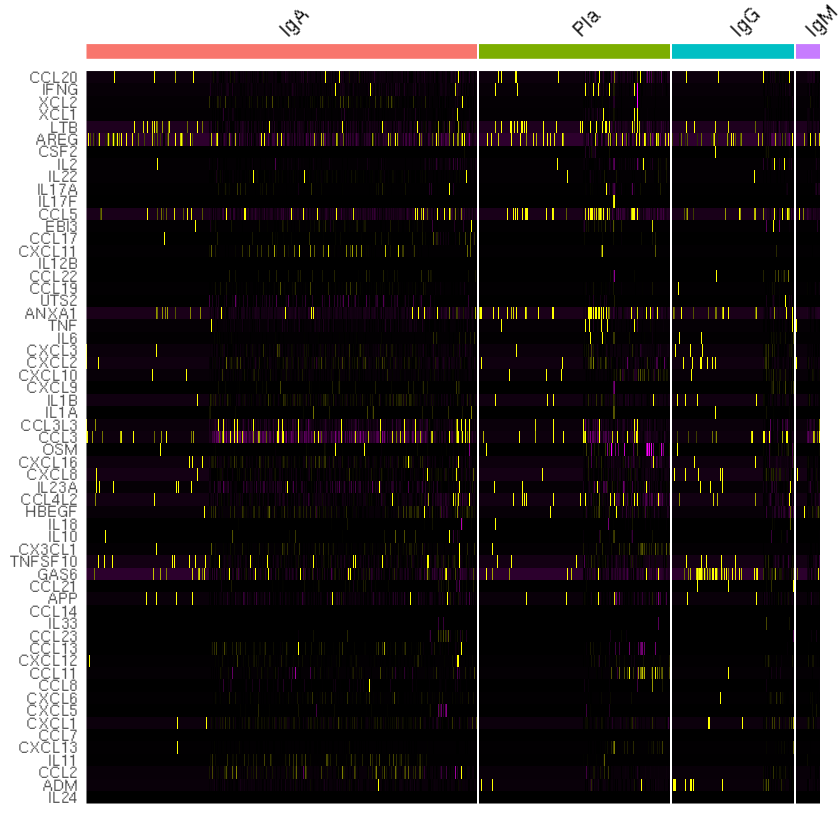

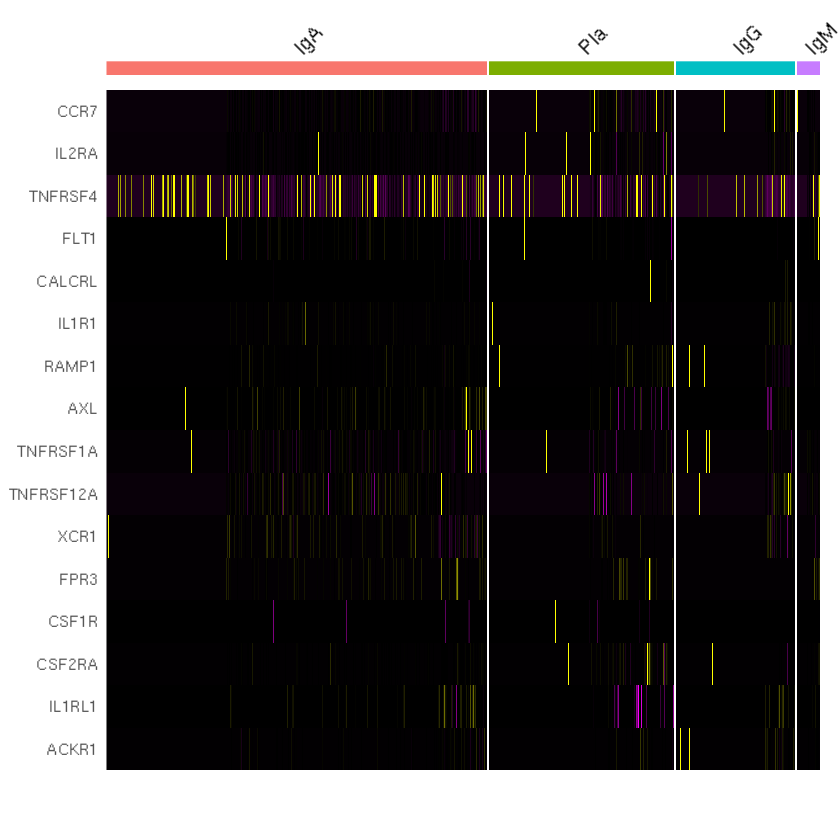

In [12]:
DoHeatmap(plasma, features = ligand, size = 4) + NoLegend()
DoHeatmap(plasma, features = receptor, size = 4) + NoLegend()

Warning message in DoHeatmap(stromal.gli, features = ligand, size = 4):
“The following features were omitted as they were not found in the scale.data slot for the integrated assay: IL17, IL23, TGFB3, IL7, IL34, HEBP1, IL12A, CCL28, ARF1, CALM2, TNFSF12, IAPP, IFNB1, CSF1, VEGFB, CCL25, BTLA, IL15, TNFSF8, IL16, IL32, PROK2, TNFSF13B, IL26, LTA, TGFB1”
Warning message in DoHeatmap(stromal.gli, features = receptor, size = 4):
“The following features were omitted as they were not found in the scale.data slot for the integrated assay: CXCR2, CCR3, CHRM3, TNFRSF8, IL6R, CD4, CCR2, CX3CR1, FPR2, CCR1, IFNGR1, IL17RA, ACKR2, NOTCH1, TGRBR2, AKAP9, IL11RA, EGFR, OSMR, LTBR, IL15RA, IFNAR1, TNFRSF10A, TNFRSF13B, CCR8, IL18R1, IL23R, CCR6, CCR5, IL7R, CXCR6, CCR9, IL12RB1, CCR4, IL27RA, CXCR4, IL10RA, CXCR3”


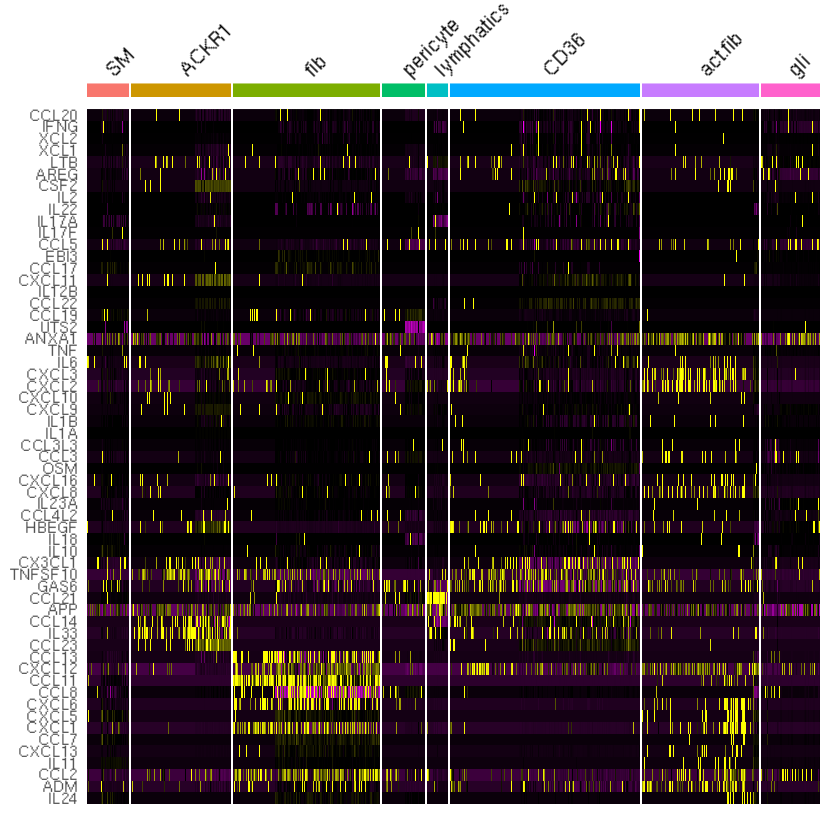

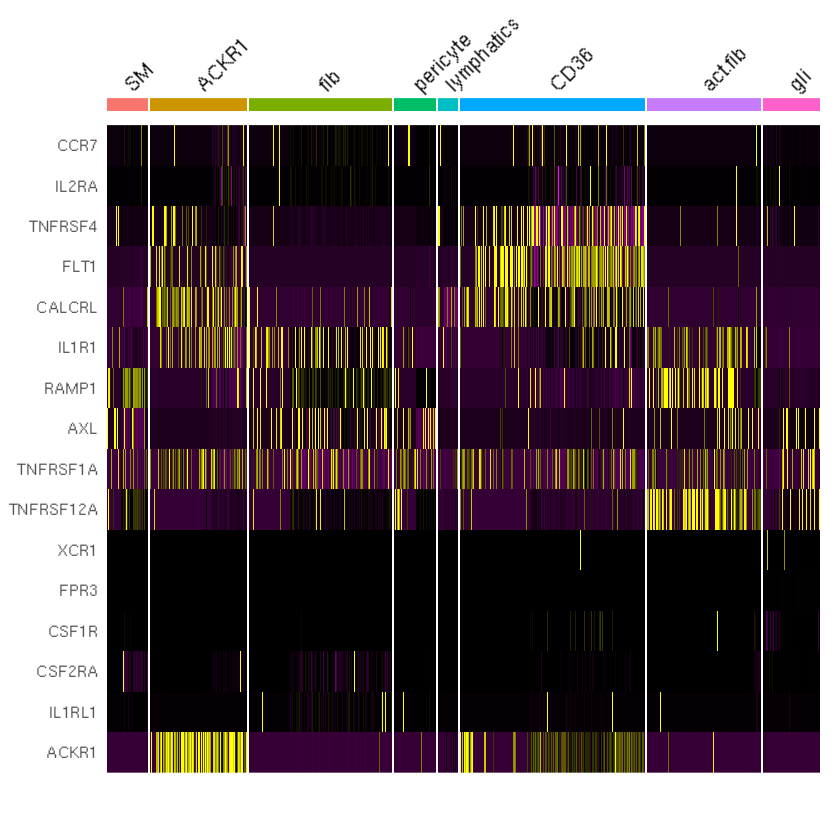

In [13]:
DoHeatmap(stromal.gli, features = ligand, size = 4) + NoLegend()
DoHeatmap(stromal.gli, features = receptor, size = 4) + NoLegend()

Warning message in DoHeatmap(mnp_pdc, features = ligand, size = 4):
“The following features were omitted as they were not found in the scale.data slot for the integrated assay: IL17, IL23, TGFB3, IL7, IL34, HEBP1, IL12A, CCL28, ARF1, CALM2, TNFSF12, IAPP, IFNB1, CSF1, VEGFB, CCL25, BTLA, IL15, TNFSF8, IL16, IL32, PROK2, TNFSF13B, IL26, LTA, TGFB1”
Warning message in DoHeatmap(mnp_pdc, features = receptor, size = 4):
“The following features were omitted as they were not found in the scale.data slot for the integrated assay: CXCR2, CCR3, CHRM3, TNFRSF8, IL6R, CD4, CCR2, CX3CR1, FPR2, CCR1, IFNGR1, IL17RA, ACKR2, NOTCH1, TGRBR2, AKAP9, IL11RA, EGFR, OSMR, LTBR, IL15RA, IFNAR1, TNFRSF10A, TNFRSF13B, CCR8, IL18R1, IL23R, CCR6, CCR5, IL7R, CXCR6, CCR9, IL12RB1, CCR4, IL27RA, CXCR4, IL10RA, CXCR3”


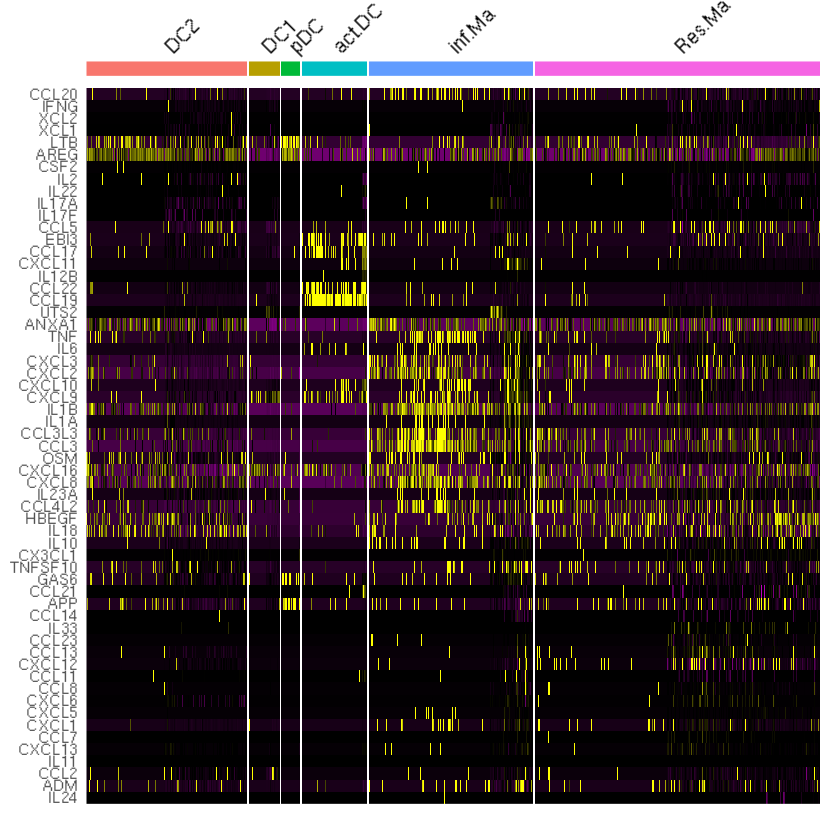

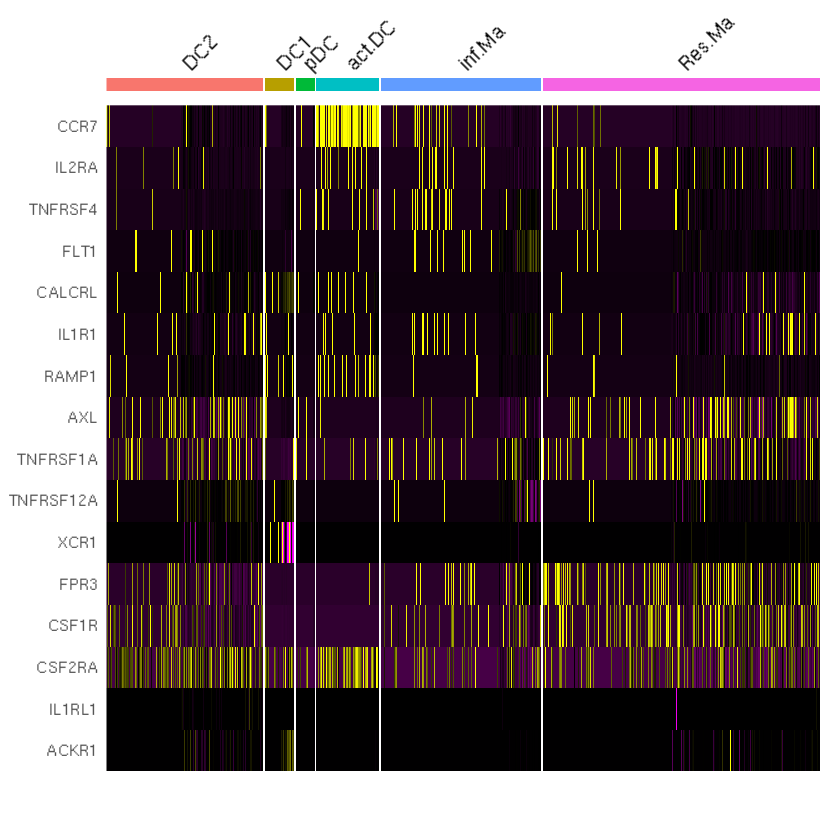

In [14]:
DoHeatmap(mnp_pdc, features = ligand, size = 4) + NoLegend()
DoHeatmap(mnp_pdc, features = receptor, size = 4) + NoLegend()

###  when compared to the entire cluster

In [15]:
ligand <- c('GAS6', 'CXCL11', 'TNFSF10', 'CCL14', 'IL33', 'CCL23', 'ANXA1', 'IL6', 'CXCL3', 'CXCL2', 'CCL3', 'CXCL16', 'CXCL8', 'CXCL12', 
            'CXCL13', 'IL11', 'ADM', 'EBI3', 'CCL17', 'CCL22', 'CCL19', 'CCL20', 'TNF', 'CXCL10', 'CXCL9', 'IL1B', 'IL1A', 
            'CCL3L3', 'OSM', 'IL23A', 'CCL4L2')
receptor <- c('CALCRL', 'IL1R1', 'ACKR1', 'RAMP1', 'TNFRSF12A', 'CCR7', 'CSF2RA')

In [ ]:
for (i in ligand) {
    print(VlnPlot(ALL, features = i, group.by = "celltype", pt.size = 0))
    print(VlnPlot(ALL, features = i, group.by = "celltype", pt.size = 0)+ geom_boxplot())
}

In [ ]:
for (i in receptor) {
    print(VlnPlot(ALL, features = i, group.by = "celltype", pt.size = 0))
    print(VlnPlot(ALL, features = i, group.by = "celltype", pt.size = 0)+ geom_boxplot())
}

### Compare the expression level of the found ligand and receptor in the GIMATS module

In [16]:
ligand <- c('CXCL11', 'CCL14', 'IL33', 'CCL23', 'CXCL3', 'CXCL2', 'CCL3', 'CXCL8', 'ADM', 'EBI3', 'CCL17', 'CCL22', 'CCL19', 'TNF', 
            'CXCL10', 'CXCL9', 'IL1B', 'IL1A', 'CCL3L3', 'OSM')
receptor <- c('ACKR1', 'TNFRSF12A', 'CCR7', 'CSF2RA')

In [17]:
Idents(GIMATS) <- GIMATS$celltype
GIMATS <- ScaleData(GIMATS, verbose = FALSE)

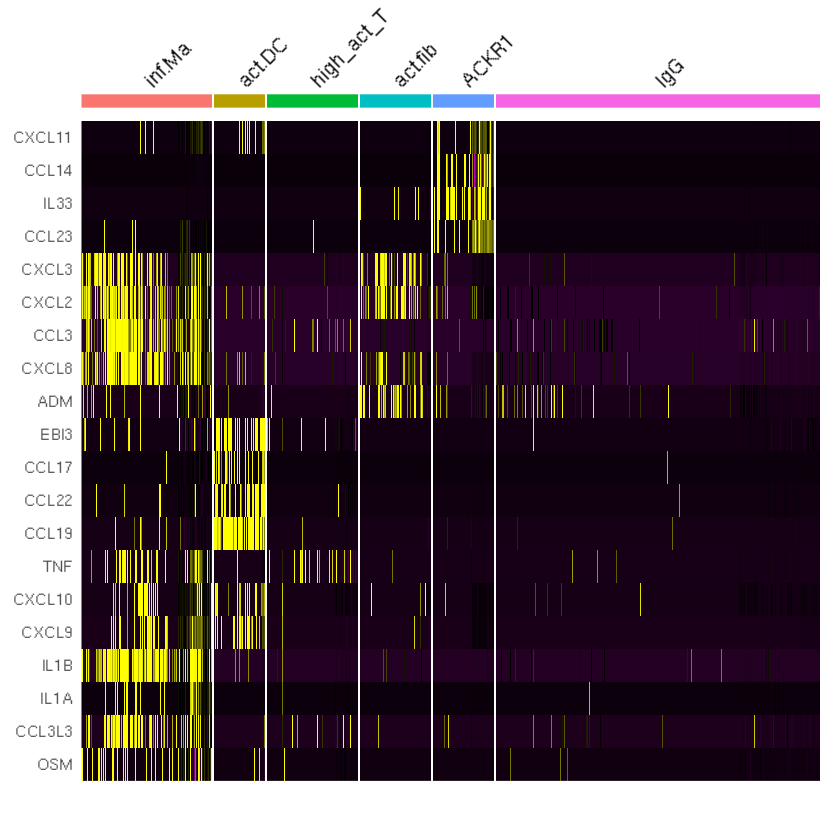

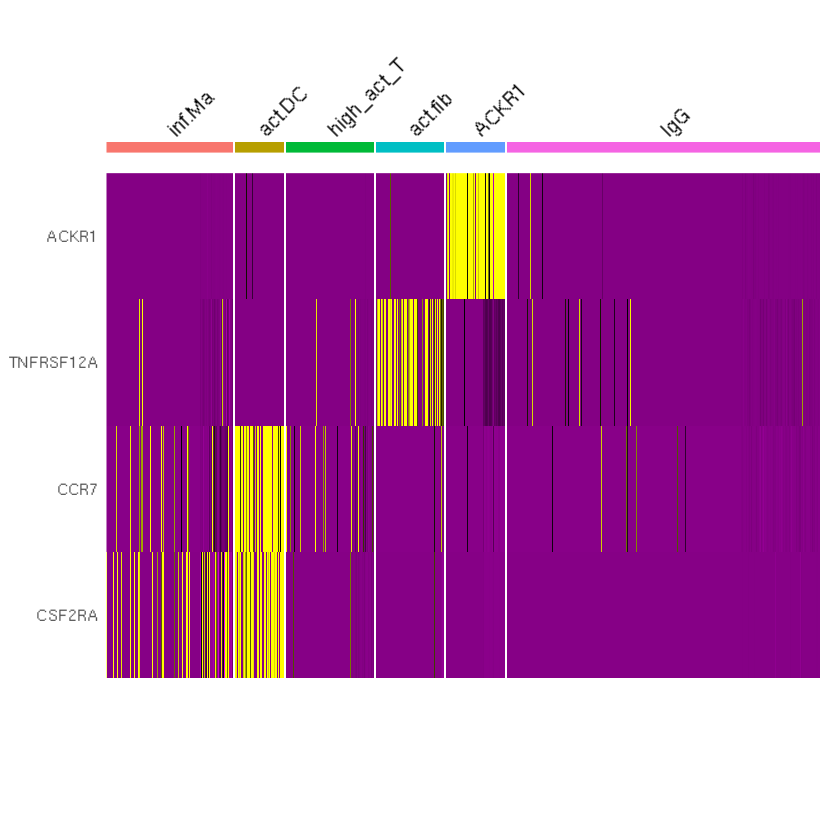

In [18]:
DoHeatmap(GIMATS, features = ligand, size = 4) + NoLegend()
DoHeatmap(GIMATS, features = receptor, size = 4) + NoLegend()

### Comparison of the expression level of inf vs uninf in the GIMATS module for the found ligand and receptor

In [ ]:
for (i in ligand) {
    print(VlnPlot(GIMATS, features = i, split.by = "split", group.by = "celltype", pt.size = 0))
    print(VlnPlot(GIMATS, features = i, split.by = "split", group.by = "celltype", pt.size = 0)+ geom_boxplot())
}

In [ ]:
for (i in receptor) {
    print(VlnPlot(GIMATS, features = i, split.by = "split", group.by = "celltype", pt.size = 0))
    print(VlnPlot(GIMATS, features = i, split.by = "split", group.by = "celltype", pt.size = 0)+ geom_boxplot())
}

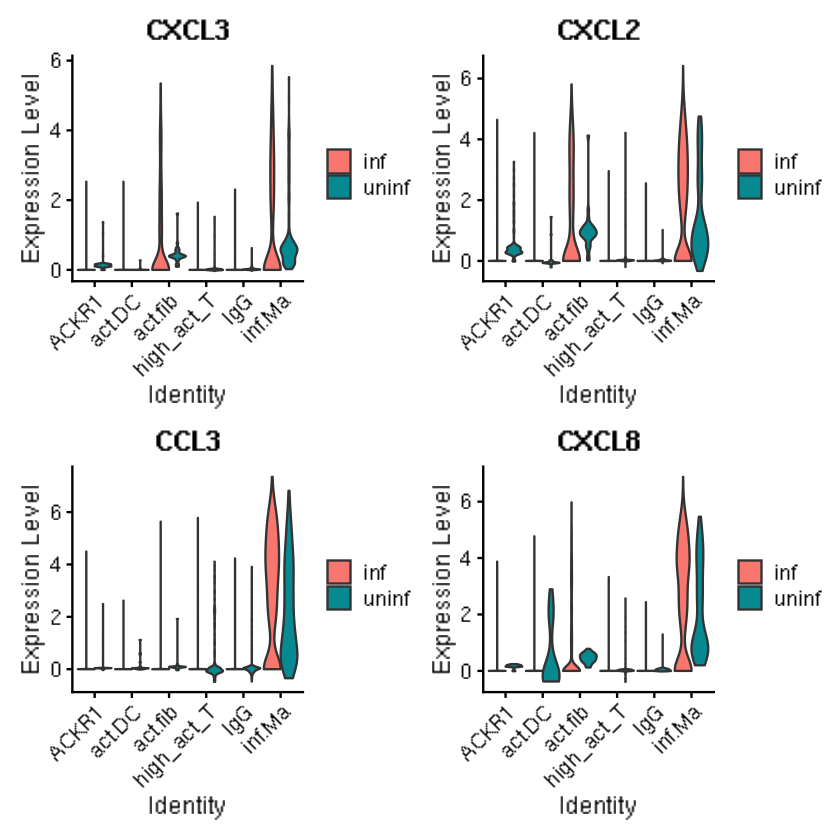

In [20]:
plots <- VlnPlot(GIMATS, features = c("CXCL3", "CXCL2", "CCL3", "CXCL8"), split.by = "split", group.by = "celltype", 
    pt.size = 0, combine = FALSE)
wrap_plots(plots = plots, ncol = 2)

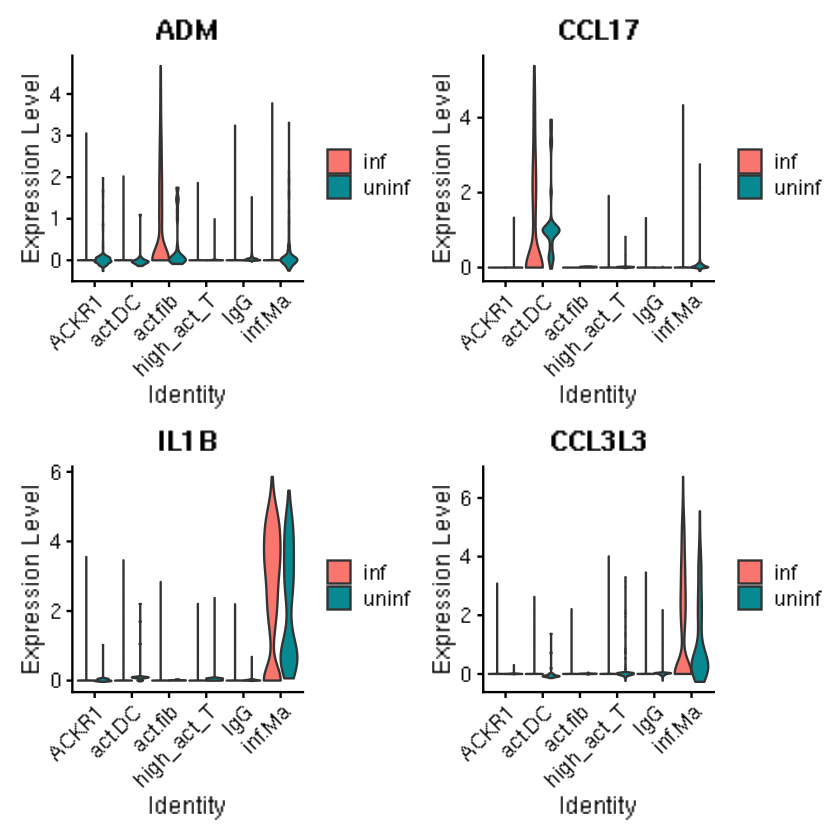

In [21]:
plots <- VlnPlot(GIMATS, features = c("ADM", "CCL17", "IL1B", "CCL3L3"), split.by = "split", group.by = "celltype", 
    pt.size = 0, combine = FALSE)
wrap_plots(plots = plots, ncol = 2)

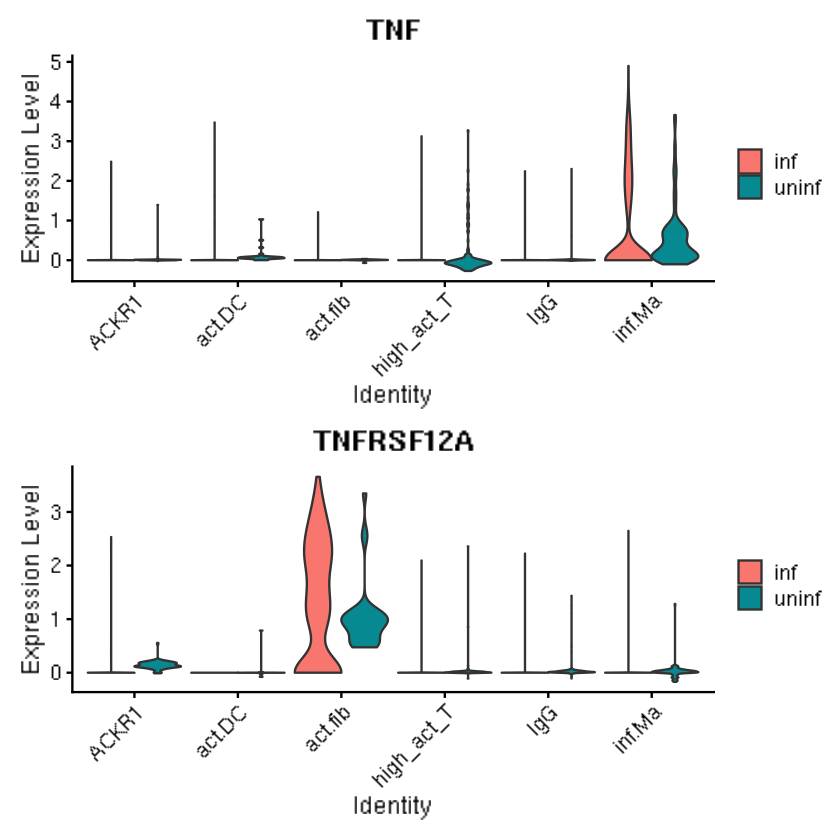

In [22]:
plots <- VlnPlot(GIMATS, features = c("TNF", "TNFRSF12A"), split.by = "split", group.by = "celltype", 
    pt.size = 0, combine = FALSE)
wrap_plots(plots = plots, ncol = 1)

# CellphoneDB data prepare

In [ ]:
a <- GIMATS[['celltype']]

In [ ]:
write.table(a,file="/data/yebin/singlecell/cellphonedb/GIMATS_meta.txt",quote=FALSE,sep="\t")

In [ ]:
a <- GetAssayData(GIMATS)

In [ ]:
write.table(a,file="/data/yebin/singlecell/cellphonedb/GIMATS_counts.txt",quote=FALSE,sep="\t")

In [ ]:
Idents(GIMATS) <- "split"
GIMATS_inf <- subset(GIMATS, idents = "inf")
GIMATS_uninf <- subset(GIMATS, idents = "uninf")

In [ ]:
a <- GIMATS_inf[['celltype']]
b <- GIMATS_uninf[['celltype']]

In [ ]:
write.table(a,file="/data/yebin/singlecell/cellphonedb/GIMATS_inf_meta.txt",quote=FALSE,sep="\t")
write.table(b,file="/data/yebin/singlecell/cellphonedb/GIMATS_uninf_meta.txt",quote=FALSE,sep="\t")

In [ ]:
a <- GetAssayData(GIMATS_inf)
b <- GetAssayData(GIMATS_uninf)

In [ ]:
write.table(a,file="/data/yebin/singlecell/cellphonedb/GIMATS_inf_counts.txt",quote=FALSE,sep="\t")
write.table(b,file="/data/yebin/singlecell/cellphonedb/GIMATS_uninf_counts.txt",quote=FALSE,sep="\t")